In [1]:
# SBA data analysis to minimize the risk of default (charged off)

import pandas as pd
import numpy as np
import missingno as msno
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# real dataset from the U.S. Small Business Administration
# https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

SBA = pd.read_csv("C:/DataAnalysis/archive_SBA/SBAnational.csv",
                 index_col = False)

SBA = SBA.astype({"City":"category", 
                 "State":"category",
                 "Bank":"category",
                 "BankState":"category",
                 "NewExist":"category",
                 "UrbanRural":"category",
                 "RevLineCr":"category",
                 "MIS_Status":"category",
                  "LowDoc":"category"})
    # [문자형에서 범주형 타입 변환]
    
SBA["DisbursementGross"] = SBA["DisbursementGross"].str.replace("$","")
SBA["BalanceGross"] = SBA["BalanceGross"].str.replace("$","")
SBA["ChgOffPrinGr"] = SBA["ChgOffPrinGr"].str.replace("$","")
SBA["GrAppv"] = SBA["GrAppv"].str.replace("$","")
SBA["SBA_Appv"] = SBA["SBA_Appv"].str.replace("$","")

SBA["DisbursementGross"] = SBA["DisbursementGross"].str.replace(",","")
SBA["BalanceGross"] = SBA["BalanceGross"].str.replace(",","")
SBA["ChgOffPrinGr"] = SBA["ChgOffPrinGr"].str.replace(",","")
SBA["GrAppv"] = SBA["GrAppv"].str.replace(",","")
SBA["SBA_Appv"] = SBA["SBA_Appv"].str.replace(",","")

SBA["DisbursementGross"] = SBA["DisbursementGross"].str.strip()
SBA["BalanceGross"] = SBA["BalanceGross"].str.strip()
SBA["ChgOffPrinGr"] = SBA["ChgOffPrinGr"].str.strip()
SBA["GrAppv"] = SBA["GrAppv"].str.strip()
SBA["SBA_Appv"] = SBA["SBA_Appv"].str.strip()
    # [문자열 $ 화폐단위 제거 및 공백 제거] [연속형 타입 변환]

SBA = SBA.astype({"DisbursementGross":"float",
                  "BalanceGross":"float",
                  "ChgOffPrinGr":"float", 
                  "GrAppv":"float", 
                  "SBA_Appv":"float"})

CodeBook = pd.DataFrame({
    "features" :["LoanNr_ChkDgt", "Name", "City", "State", "Zip", 
                "Bank", "BankState", "NAICS", 
                "ApprovalDate", "ApprovalFY", "Term", 
                "NoEmp", "NexExist", "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", 
                "RevLineCr", "LowDoc", "ChgOffDate", 
                "DisbursementDate", "DisbursementGross", "BalanceGross", 
                "MIS_Status", "ChgOffPrinGr", "GrAppv", "SBA_Appv"],
    
    "description":["Identifier Primary key", "Borrower name", "Borrower city", "Borrower state", "Borrower zip code", 
                   "Bank name", "Bank state", "North American industry classification system code", 
                   "Date SBA commitment issued", "Fiscal year of commitment", "Loan term in months", 
                   "Number of business employees", "1 = Existing business, 2 = New business", "Number of jobs created", "Number of jobs retained", "Franchise code, (00000 or 00001) = No franchise", "1 = Urban, 2 = rural, 0 = undefined", 
                   "Revolving line of credit: Y = Yes, N = No", "LowDoc Loan Program: Y = Yes, N = No", "The date when a loan is declared to be in default", 
                   "Disbursement date", "Amount disbursed", "Gross amount outstanding", 
                   "Loan status charged off = CHGOFF, Paid in full =PIF", "Charged-off amount", "Gross amount of loan approved by bank", "SBA’s guaranteed amount of approved loan"]
})

# SBA["NewExist"] = SBA["NewExist"].set_categories([1,2], ordered = True)
    # [NewExist] 1 = 기존 비즈니스, 2 = 새 비즈니스인 더미 변수
    # [UrbanRural] 1 = 도시, 2 = 시골, 0 = 정의되지 않음인 더미 변수
CodeBook

C:\Users\sooyeon Kang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_25040/195925718.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SBA["DisbursementGross"] = SBA["DisbursementGross"].str.replace("$","")
C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_25040/195925718.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SBA["BalanceGross"] = SBA["BalanceGross"].str.replace("$","")
C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_25040/195925718.py:20: FutureWa

,features,description
0,LoanNr_ChkDgt,Identifier Primary key
1,Name,Borrower name
2,City,Borrower city
3,State,Borrower state
4,Zip,Borrower zip code
5,Bank,Bank name
6,BankState,Bank state
7,NAICS,North American industry classification system ...
8,ApprovalDate,Date SBA commitment issued
9,ApprovalFY,Fiscal year of commitment


In [3]:
SBA["ApprovalDate"] = pd.to_datetime(SBA["ApprovalDate"])
SBA["ChgOffDate"] = pd.to_datetime(SBA["ChgOffDate"])
SBA["DisbursementDate"] = pd.to_datetime(SBA["DisbursementDate"])
    # [문자형에서 날짜형 타입 변환]

# [Error]
# SBA["ApprovalFY"] = pd.to_datetime(SBA["ApprovalFY"].dt.strftime("%Y"))
SBA["ApprovalFY"] = SBA["ApprovalFY"].astype("category")
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  category      
 3   State              899150 non-null  category      
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  category      
 6   BankState          897598 non-null  category      
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  category      
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  category      
 13  CreateJob          899164 non-null  int64   

<AxesSubplot:>

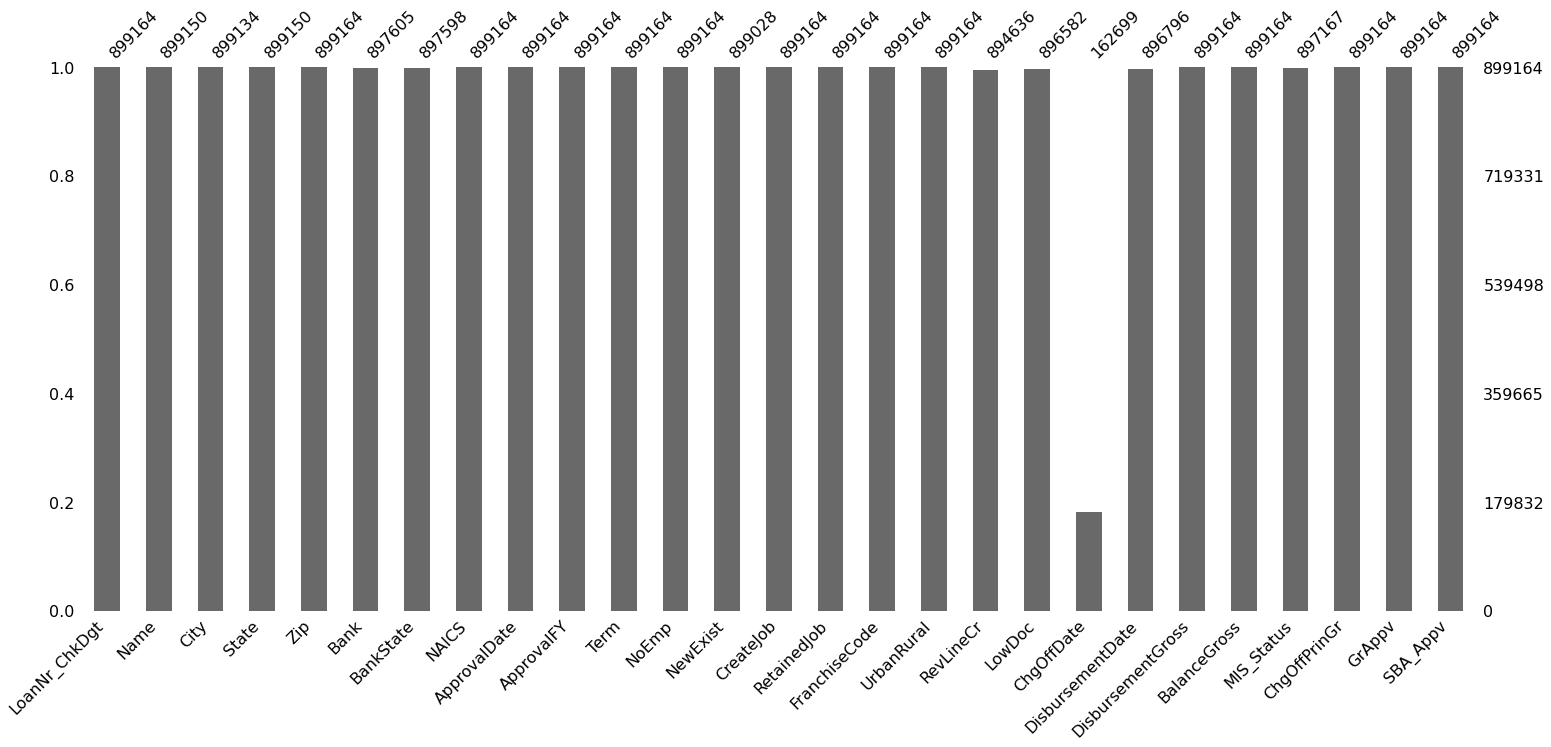

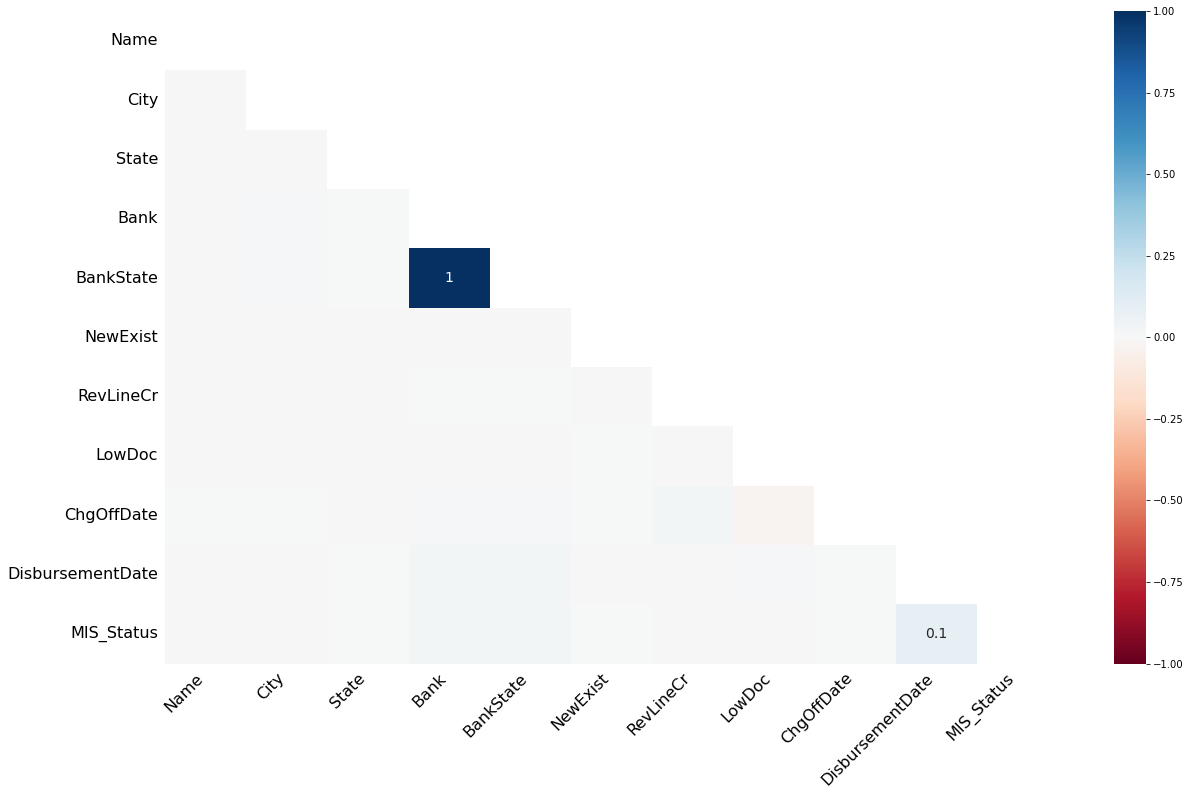

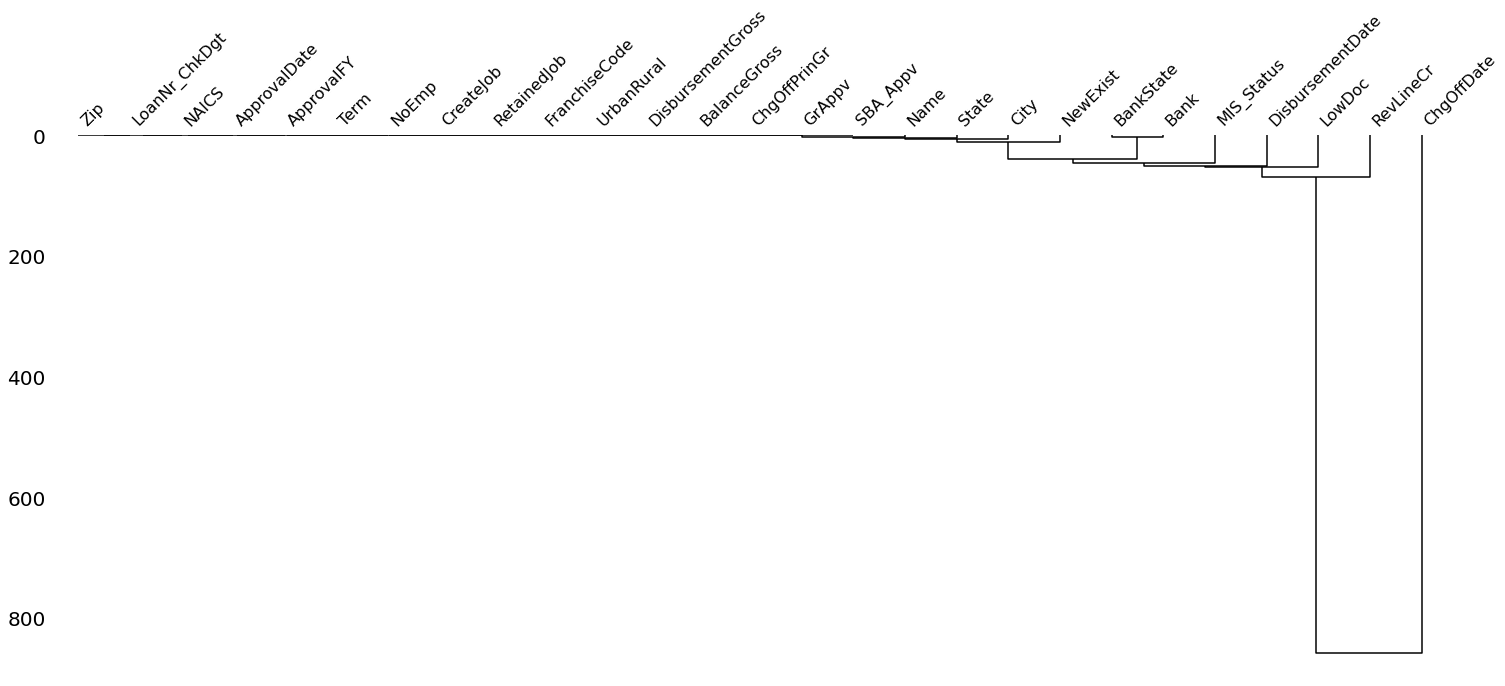

In [4]:
# NA or NULL detection : 899164 entries

SBA.isnull().sum()
    # [Name] NA's 14
    # [City] NA's 30
    # [State] NA's 14
    # [Bank] NA's 1559
    # [BankState] NA's 1566
    # [NewExist] 136
    # [RevLineCr] NA's 4528
    # [LowDoc] NA's 2582
    # [ChgOffDate] NA's 736465
    # [DisbursementDate] NA's 2368
    # [MIS_Status] NA's 1997
msno.bar(SBA)
msno.heatmap(SBA)
msno.dendrogram(SBA)

In [5]:
# counting Bank, State, City

SBA.groupby(["Bank"], as_index = False).size()
SBA.groupby(["State"], as_index = False).size()
SBA.groupby(["City"], as_index = False).size()

,City,size
0,"#115, BALTIMORE",1
1,&12151 ALCOSTA BLVD. SAN,1
2,(BOX 79) CAMP SHERMAN,1
3,(RODERFIELD) JOLO,1
4,-,1
...,...,...
32576,warrensville heights,1
32577,washington,2
32578,watertown,1
32579,westfield,1


In [6]:
# outlier : boxplot(IQR), 3*sigma

SBA.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,8.430376,10.797257,2753.725933,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,236.688165,237.120600,12758.019136,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,0.000000,0.000000,1.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,1.000000,4.000000,1.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,8800.000000,9500.000000,99999.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


<AxesSubplot:>

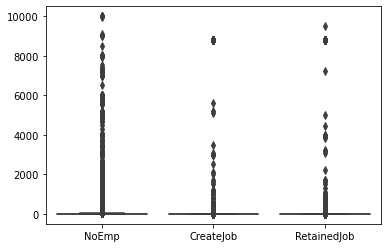

In [7]:
sns.boxplot(data = SBA.iloc[:, [11,13,14]])

<AxesSubplot:>

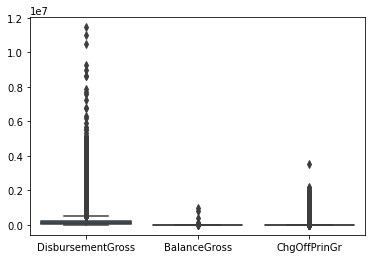

In [8]:
sns.boxplot(data = SBA.iloc[:, [21,22,24]])

<AxesSubplot:>

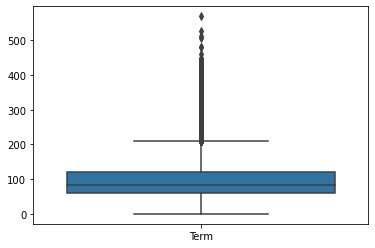

In [9]:
sns.boxplot(data = SBA.iloc[:, [10]])

<AxesSubplot:>

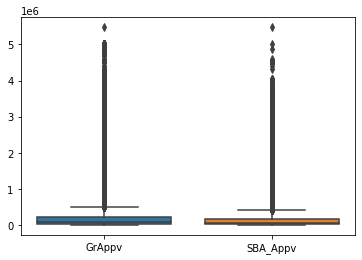

In [10]:
sns.boxplot(data = SBA.iloc[:, [25,26]])

In [12]:
def outlier(SBA):
    IQR = SBA.quantile(0.75) - SBA.quantile(0.25)
    return pd.DataFrame(
        [[SBA.quantile(0.25)-(1.5 * IQR), SBA.quantile(0.75)+(1.5 * IQR)]] * SBA.shape[0],
        columns = ["lower", "upper"], 
        index = SBA.index)
outlier(SBA.iloc[:, 21])
    # [DisbursementGross] 총 지출액의 이상치 판정기준 [-252000.0, 532000.0]
outlier(SBA.iloc[:, 25])
    # [Gross amount of loan approved by bank] 은행 대출승인액 이상치 판정기준 [-250000.0, 510000.0]

,lower,upper
0,-250000.0,510000.0
1,-250000.0,510000.0
2,-250000.0,510000.0
3,-250000.0,510000.0
4,-250000.0,510000.0
...,...,...
899159,-250000.0,510000.0
899160,-250000.0,510000.0
899161,-250000.0,510000.0
899162,-250000.0,510000.0
